<a href="https://colab.research.google.com/github/sammyculotta/PHY122-Lab/blob/main/phy122_N2L_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phy 122 Lab 2

Michael Culotta

03/26/25

#  <font color='Red'> **Import Necessary Modules** </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, sqrt, array, zeros
from numpy.linalg import norm

π = np.pi

def d(X):
    return np.gradient(X, axis=0)

###  <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

###  <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [ ]:
dt = 0.1  ## s (detector time resolution, time-step)
t0 = 0.0  ## s (initial experiment time)
tf = 10.  ## s (final   experiment time)

T  = arange(t0, tf, dt)

print(T)
print("we have " + str(len(T)) + " time points")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
we have 100 time points


#   <font color='Red'> **Experiment I: Gravity Free-Fall** </font>

##   <font color='Red'> To begin lets start with by defining an initial position, initial velocity, and mass. </font>

In [ ]:
x_0  = array([0., 0., 0.]) ## m : initial position vector/array
v_0  = array([0., 0., 0.]) ## m/s : initial velocity vector/array
m    =  10.00   ## kg : mass of your particle
g    = -9.81    ## m/s/s : surface-gravity

##   <font color='Red'> Now lets define our force as a function of time, f_t . </font>

In [ ]:
f_gravity      = zeros( (len(T), 3) ) ## initialize an empty (i.e. zero-filled) 'force-trajectory' array
f_gravity[:,0] = m * g ## fill-in all entries of axis-0, i.e. the x-axis, for all, hence ":" time-points

##   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = f_gravity[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = f_gravity[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration


###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

In [ ]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t f_t/mass\} in matplotlib, all as a function of time.
*  Make sure to include LABELS for all plots!
*  Make sure to include Captions for all plots!
</font>



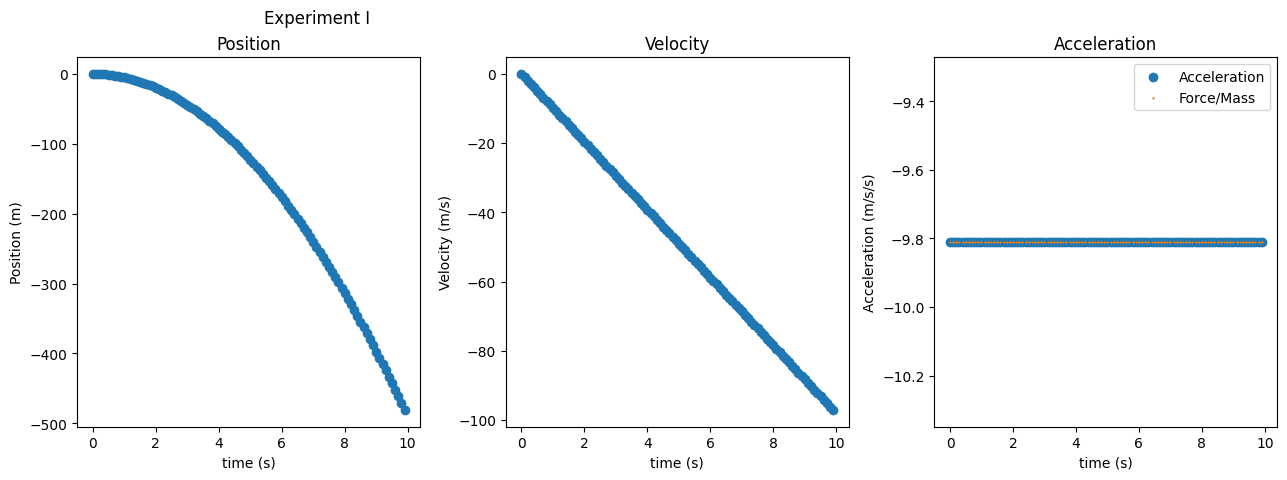

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tx[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, V_tx[:,0])
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, A_tx[:,0], label="Acceleration")
ax3.scatter(T, f_gravity[:,0]/m, s=0.5, label="Force/Mass")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

The above plots show the effects of gravity on an object in free fall. I originally wanted to change the x_0 array initial condition from 0 to 500 meters as I noticed that given the time interval of 10s the object is close to the ground at time 10. I wanted to see a more realistic scenario, otherwise we would need a big hole or large cliff for the experiment to be plausible. So, I think of this scenario of x_0=500 as being on top of a building and dropping the object. However, I noticed that the next step takes the absolute value and analyzes simply the magnitude. Additionally, when I set x_0 =500 the y axis for the following plots was inaccurate and I could not figure out how to fix it with the code. Therefore, I left the original conditions as is. Given constant acceleration we can expect to have a linear velocity with respect to time and a quadratic position with respect to time as shown above.  

###   <font color='Red'> Let's replot these graphs but for the magnitude of the vectors.
*  Make sure to include LABELS for all plots!
*  Make sure to include Captions for all plots!
</font>

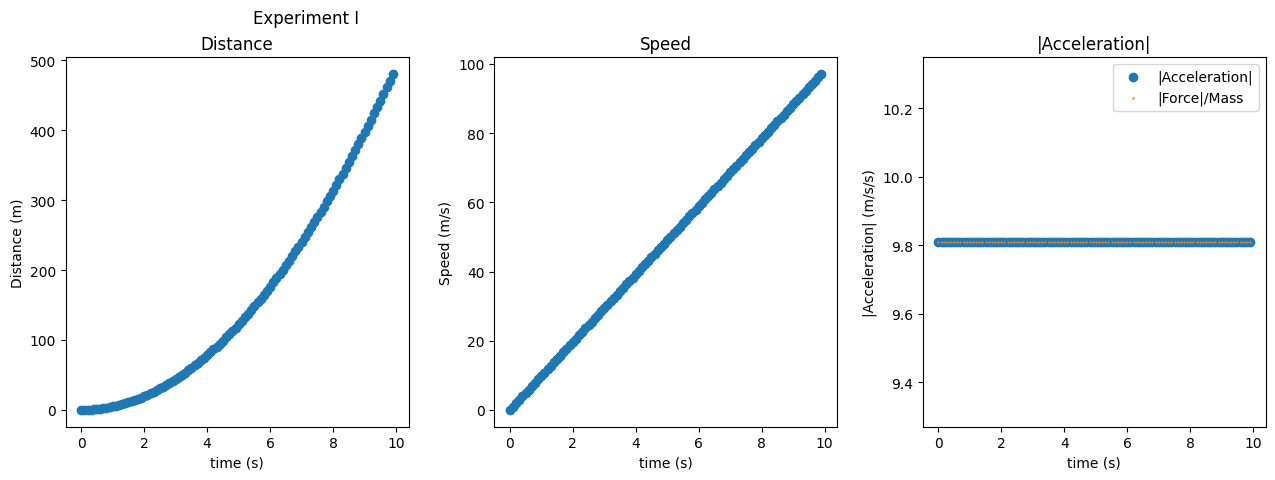

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, norm(R_tx, axis=1))
ax1.set_title("Distance")
ax1.set(xlabel='time (s)', ylabel='Distance (m)')

ax2.scatter(T, norm(V_tx, axis=1))
ax2.set_title("Speed")
ax2.set(xlabel='time (s)', ylabel='Speed (m/s)')

ax3.scatter(T, norm(A_tx, axis=1), label="|Acceleration|")
ax3.scatter(T, norm(f_gravity, axis=1)/m, s=0.5, label="|Force|/Mass")
ax3.legend(loc="upper right")
ax3.set_title("|Acceleration|")
ax3.set(xlabel='time (s)', ylabel='|Acceleration| (m/s/s)')

fig.show()

The above plots show the magnitude of each variable by taking the absolute value of the acceleration. Again, the acceleration is constant which leads to a linearly increasing velocity with respect to time and a quadratic position with respect to time. By showing the magnitude, we go from a vector quantity to a scalar quantity which is independent of direction. So, while at first glance one might think our object is increasing vertically with respect to time, it is not. These are simply the scalar quantity plotted against time. Hence this is why we label the y axis as speed and not velocity.

#   <font color='Red'> **Experiment II: Forces on a Cart I** </font>

###  <font color='Red'> To begin lets start with by defining an initial position & velocity, and mass. </font>

In [ ]:
x_0  = array([1., 0., 0.]) ## m : initial position vector/array
v_0  = array([5., 0., 0.]) ## m/s : initial velocity vector/array
m    = 5.0 ## kg : mass of your particle

###  <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time.
*  Make sure to include LABELS for all plots!
*  Make sure to include Captions for all plots!
</font>

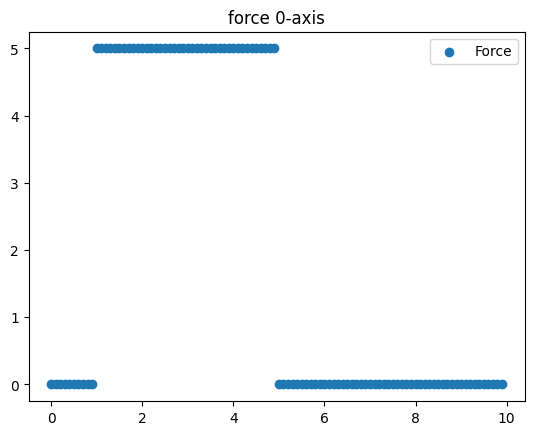

In [ ]:
F_tx          = zeros( (len(T), 3) ) ## initialize an empty (ie zero-filled) 'force-trajectory' array
F_tx[10:50,:] = 5*array([1.,0.,0.])  ## take entries 10-through-50 and fill-in with given vector/array

### plot 0-axis force
plt.scatter(T, F_tx[:,0], label="Force")
plt.legend(loc="upper right")
plt.title("force 0-axis")
plt.show()

In the above plot we initialize an empty 'force trajectory' array which consists of 100 entries and say that a force acts or is applied from entry 10-50. If there were another plot of the position of an object, we would expect for the object’s position to change in some way from the force being applied from t1-t5. This plot shows 0 force from t=0-t=1, then a force of 5 from t=1-t=5, and finally back to 0 force from t=5-t=10.

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = F_tx[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = F_tx[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration


###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [ ]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory

###  <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t f_t/mass\} in matplotlib, all as a function of time.
*  Make sure to include LABELS for all plots!
*  Make sure to include Captions for all plots!
 </font>


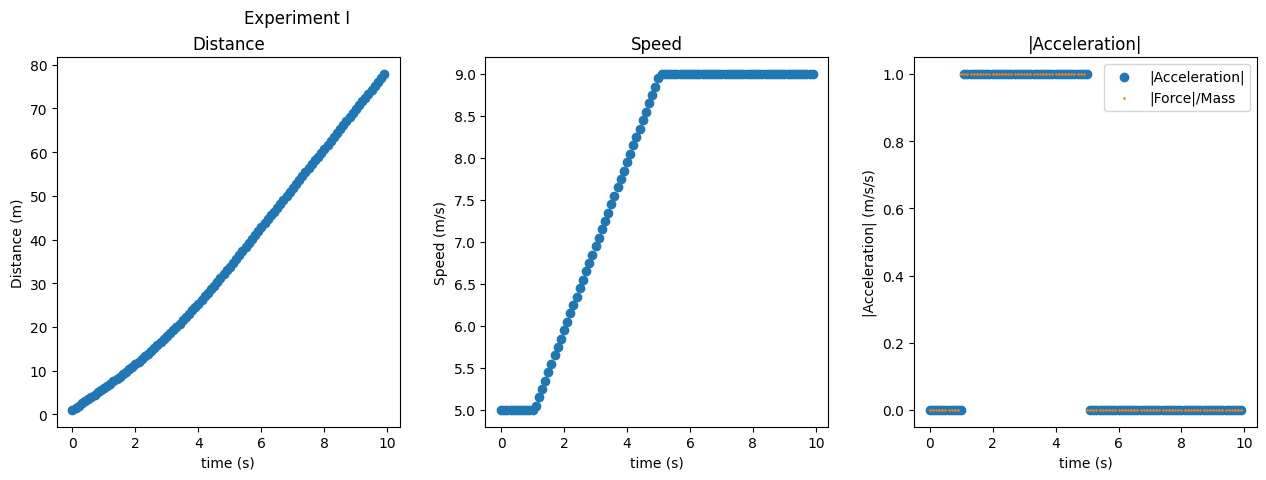

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, norm(R_tx, axis=1))
ax1.set_title("Distance")
ax1.set(xlabel='time (s)', ylabel='Distance (m)')

ax2.scatter(T, norm(V_tx, axis=1))
ax2.set_title("Speed")
ax2.set(xlabel='time (s)', ylabel='Speed (m/s)')

ax3.scatter(T, norm(A_tx, axis=1), label="|Acceleration|")
ax3.scatter(T, norm(F_tx, axis=1)/m, s=0.8, label="|Force|/Mass")
ax3.legend(loc="upper right")
ax3.set_title("|Acceleration|")
ax3.set(xlabel='time (s)', ylabel='|Acceleration| (m/s/s)')

fig.show()

In the above plots we see the effects of the force of 5 from t=1-t=5 on the objects speed and position. Since the force is 5N and the object’s mass is 5kg, we can expect an acceleration of 1 since force is proportional to mass. When we take the absolute value of the acceleration we are left with the magnitude, and this is why we plot speed and not velocity. We can see that since acceleration is a non-zero constant from t=1-t=5 we can expect to have a linear velocity with a slope equal to the acceleration for said period. Furthermore, we can expect the position to change quadratically with respect to time for the period t=1-t=5. This is indeed the case. When the speed is constant from t=0-t=1 and from t=5-t=10 we can expect the position to be changing linearly with respect to time, not quadratically as shown above.

#   <font color='Red'> **Experiment III: Forces on a Cart II** </font>

###   <font color='Red'> To begin lets start with by defining an initial position & velocity. </font>

In [ ]:
x_0 = array([10., 0., 0.]) ## m : initial position vector/array
v_0 = array([ 1., 0., 0.]) ## m/s : initial velocity vector/array
m   = 5.0 ## kg : mass of your particle

###   <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [ ]:
dt = 0.01  ## s (detector time resolution, time-step)
t0 = 0.00  ## s (initial experiment time)
tf = 10.0  ## s (final   experiment time)

T  = arange(t0, tf, dt) ## make time-array

print("we have " + str(len(T)) + " time points")

we have 1000 time points


###   <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time.
*  Make sure to include LABELS for all plots!
*  Make sure to include Captions for all plots!
</font>

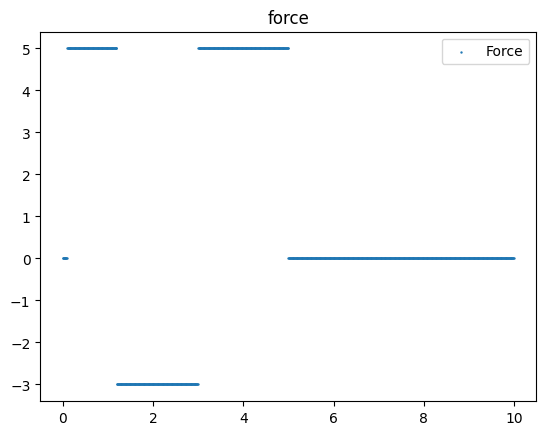

In [ ]:
F_tx = zeros( (len(T), 3) ) ## initialize an empty (ie zero-filled) 'force-trajectory' array
F_tx[10:500]  =  5*array([1.,0.,0.]) ## take entries 10-through-500 and fill-in with given vector/array
F_tx[120:300] = -3*array([1.,0.,0.]) ## take entries 120-through-300 and fill-in with given vector/array

### plot force-trajectory on 0-axis
plt.scatter(T, F_tx[:,0], s=0.5, label="Force")
plt.legend(loc="upper right")
plt.title("force")
plt.show()

In the above plot we see the force applied on an object graphed with respect to time. In our code, we define the force from entry 10-500 and set equal to 5. Furthermore, we say that from entry 120-300 the force is -3. Since the later condition follows the first condition of force =5 from 10-500, the force of -3 takes precedent as shown in the graph. Finally, since we do not have a force for time stamps 0-10 or from 500-1000, we have 0 force as seen above.

###   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
R_tx = zeros((len(T), 3)) ## initialize position-trajectory (position vectors for all times, i.e. len(T))
V_tx = zeros((len(T), 3)) ## initialize velocity-trajectory (velocity vectors for all times)
A_tx = zeros((len(T), 3)) ## initialize acceleration-trajectory (acceleration vectors for all times)

R_tx[0] = x_0 ## initialize the 0th position-trajectory entry to the initial-position
V_tx[0] = v_0 ## initialize the 0th velocity-trajectory entry to the initial-velocity
A_tx[0] = F_tx[0] / m ## initialize the 0th acceleration-trajectory entry according to Newton's 2nd Law
for t in range(1, len(T)): ## iteratively run algorithm for all entries (for all time, excluding time 0)
  R_tx[t] = R_tx[t-1] + V_tx[t-1] * dt + 0.5 * A_tx[t-1] * dt*dt ## Velocity-Verlet Step 1 : find new position from old data
  A_tx[t] = F_tx[t-1] / m ## determine the t-th acceleration entry according to Newton's 2nd Law of the t-th force/mass
  V_tx[t] = V_tx[t-1] + 0.5 * ( A_tx[t-1] + A_tx[t] ) * dt ## Velocity-Verlet Step 3 : find new velociy from old data & new accleration


###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [ ]:
dRdt_tx = d(R_tx)/dt ## take numerical-time-derivative of the aforementioned position-trajectory
dVdt_tx = d(V_tx)/dt ## take numerical-time-derivative of the aforementioned velocity-trajectory


###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dvdt_t, f_t/mass\} in matplotlib, all as a function of time.
*  Make sure to include LABELS for all plots!
*  Make sure to include Captions for all plots!
 </font>

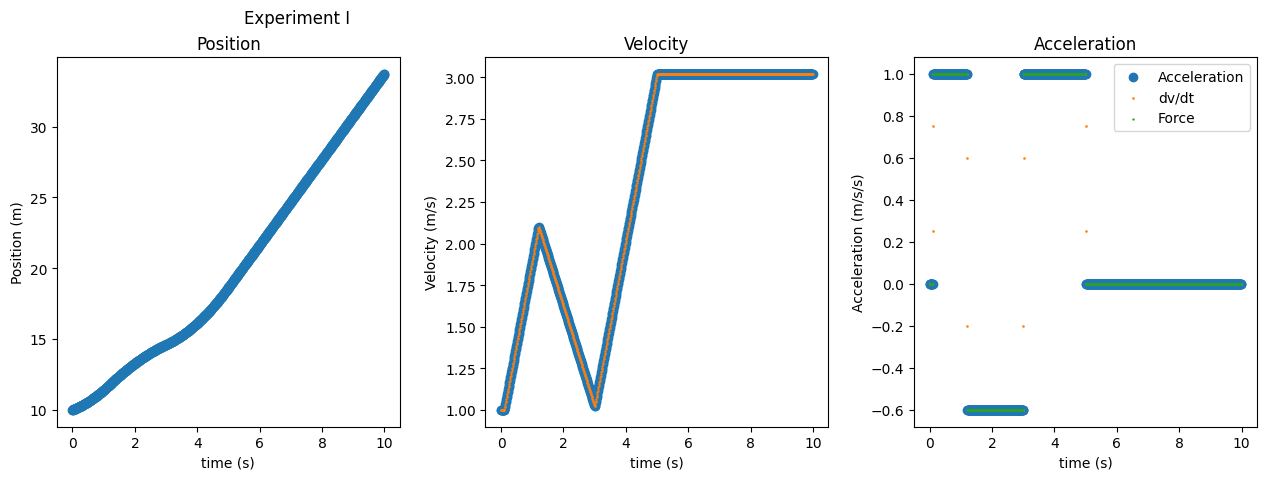

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Experiment I')
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(T, R_tx[:,0])
ax1.set_title("Position")
ax1.set(xlabel='time (s)', ylabel='Position (m)')

ax2.scatter(T, V_tx[:,0])
ax2.scatter(T, dRdt_tx[:,0], s=0.5)
ax2.set_title("Velocity")
ax2.set(xlabel='time (s)', ylabel='Velocity (m/s)')

ax3.scatter(T, A_tx[:,0], label="Acceleration")
ax3.scatter(T, dVdt_tx[:,0], s=0.75, label="dv/dt")
ax3.scatter(T, F_tx[:,0]/m, s=0.5, label="Force")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration")
ax3.set(xlabel='time (s)', ylabel='Acceleration (m/s/s)')

fig.show()

In the above plots we see the effects of the previous steps forces being applied to velocity and position with respect to time by utilizing the velocity verlet integrator. The force of 5N when applied to the object of 5kg has an acceleration of 1 m/s^2 because force is proportional to acceleration. Similarly, when the force of -3N is applied to the object of 5kg leads to an acceleration of -0.6m/s^2. When acceleration is a non-zero constant we can expect the velocity to be linear. More specifically the velocity will be linear with a slope proportional to the acceleration constant. When the acceleration is zero, we can expect the velocity to be unchanging. Finally, we see that the velocity changes with respect to time but is always positive. Therefore, the position with respect to time will always be increasing. If we had a negative acceleration for a longer duration of time, we would see that the velocity would eventually turn negative causing the slope of the position function to be negative and reduced with respect to time.

###   <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###   <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

In this lab we have 3 separate experiments which demonstrate how a force affects velocity and the position of an object in 1 dimension. In experiment 1 we see the effects of gravity on an object in free fall (which assumes no effect due to air resistance). We see that because of gravity if you drop an object its speed will increase linearly with respect to time and its position quadratically. To elaborate, the higher the initial position of an object the longer the object is accelerated by the force of gravity, meaning a higher speed and a faster and faster changing position (quadratic). Therefore, if a ball is dropped from 5 meters high the final velocity when the ball hits the ground will be less than the final velocity of a ball dropped from 10 meters high.

In the next experiment we see the effects of a force acting on an object for a period, like pushing on a cart for a set amount of time. In this experiment we apply a force on the cart for a set amount of time. We can expect the cart to move as the force is applied and continue to move even if the force is stopped assuming there is no friction/resistance of any kind. Furthermore, the force is proportional to the acceleration as seen in this experiment with the acceleration of 1. While the force is applied, the speed increases, then when the force is reduced, the velocity returns to constant. Another way I think about this is a spaceship in a vacuum turning on the engine briefly we expect the rocket to move then remain moving after the engine is turned off too!

Finally in the 3rd experiment we see the effects of changing forces on an object with respect to time. We start by applying a force for a set period then changing the magnitude (and direction) of the force for another interval then back to the first force and finally to no force. We see that the changing forces affect the velocity and position of the object. It is the equivalent to pushing on the cart then pulling on the cart momentarily then pushing on the cart again then doing nothing to the cart. We see that the forces are again proportional to acceleration with the acceleration equal to 1m/s^2 and -.6m/s^2. While the positive force is being applied, we can expect the velocity to increase. While the negative force is being applied, we can expect the velocity to decrease.


###   <font color='Red'> Is the Force Proportional to the Acceleration? </font>

####   <font color='Red'> Answer while referencing your simulations. </font>

Yes. In both experiments 2 and 3 we see that this is the case.

###   <font color='Red'> Do objects with different masses fall at the same rate? </font>

####   <font color='Red'> That is neglecting air-resistance and in the same environment. Answer while referencing your simulations. </font>

Yes assuming the objects are in a vacuum they will fall at the same rate.